In [10]:
import pandas as pd
import numpy as np
import requests
import math
import time
import json
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

from summa import keywords

import ast


from nltk import TreebankWordTokenizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import string

tokenizer = TreebankWordTokenizer()
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')
lemmatizer = WordNetLemmatizer()

punct = string.punctuation
punct = punct.replace("-", "") # don't remove hyphens

import scispacy
import spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bertagrimau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bertagrimau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/bertagrimau/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
PER_PAGE=200
WAIT_SECS=0.15
WORKS_FILE_PATH = './data/works.json'

In [66]:
def fetch_page(cursor):
    base_url='https://api.openalex.org/works'
    url = '{base_url}?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor={cursor}&per-page={per_page}&mailto={mailto}'.format(
        base_url=base_url,
        cursor=cursor,
        per_page=PER_PAGE,
        mailto='bertagrim@gmail.com'
    )
    print('Senging GET {url}'.format(url=url))
          
    response = requests.get(url)
    
    if (response.status_code == 200):
        print('OK')
        return response.json()
    else:
        print('Request failed: {status_code}'.format(status_code=response.status_code))
        print(response.text)
    


In [67]:
def save_entries(page_n, results):
    offset = page_n * PER_PAGE
    from_entry_num = offset
    to_entry_num = from_entry_num + len(results)
    print('Saving new entries in positions: {from_entry_num}..{to_entry_num}'.format(
        from_entry_num=from_entry_num,
        to_entry_num=to_entry_num
    ))
    with open(WORKS_FILE_PATH, 'r+', encoding='utf-8') as file:
        entries = json.load(file)
        entries[from_entry_num:] = results
        file.seek(0)
        json.dump(entries, file)

In [68]:
page_1 = fetch_page('*')
num_pages = math.ceil(page_1['meta']['count']/PER_PAGE)
num_pages

Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK


248

In [73]:
cursor='*'
works=[]
for page_n in range(0, num_pages):
    print("Fetching page {} ...".format(page_n))
    page = fetch_page(cursor)
    works.extend(page['results'])
#     save_entries(
#         page_n=page_n,
#         results=page['results']
#     )
    time.sleep(WAIT_SECS)
    cursor=page['meta']['next_cursor']
    
with open(WORKS_FILE_PATH, 'w', encoding='utf-8') as file:
        json.dump(works, file)


Fetching page 0 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 1 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NjMuODIzNTIsIDE0OTg0MzUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjY4MzcwMjY5OCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 2 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlszODEuNDI1MzUsIDE1OTc4ODE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA2MTExOTc1NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 3 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_s

OK
Fetching page 27 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjcuMDk4MjUsIDE2Mjc0MzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4NjY0MjYyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 28 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjUuMjUyMTIsIDE1OTM1NjE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMzE2MTk2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 29 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjIuNDk2MTUsIDE1NDg5NzkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg5NTU1NjIyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 30 ...
Senging GET https://api.openalex.org/

OK
Fetching page 54 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuNzk5MjUsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc3NDc5MTkwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 55 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuMDkxNzc0LCAxNTA0MTM3NjAwMDAwLCAnaHR0cHM6Ly9vcGVuYWxleC5vcmcvVzMwOTkyNjg2MDMnXSI=&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 56 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMTguMTcwMDcsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc2OTA0ODM1OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 57 ...
Senging GET https://api.openalex.org/

OK
Fetching page 81 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils5MC40MzI2MjUsIDE1ODE5ODQwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzAwOTAxNTg5MyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 82 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OS42MDYyMSwgMTUzMzg1OTIwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1cyODg2ODk3MjA3J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 83 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OC45ODQzNzUsIDE0OTk2NDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjcyNjI1NjYyMSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 84 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 108 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni45Njk0NDQsIDE1ODA1MTUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk4MTExMDg2NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 109 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni44OTMwNiwgMTU5NjI0MDAwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDI4OTc0MTQ5J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 110 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni43MTA4MywgMTYwNzM4NTYwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDg0MzEyMDM4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 111 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 135 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NS40OTIxODgsIDE0OTg4NjcyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc1NDM3MzM1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 136 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0Mi41MzEzNywgMTYyNTcwMjQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTgyMDA5MzI4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 137 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0MS45NjQ3OSwgMTYyMTgxNDQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTY1NTMyOTMxJ10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 138 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 162 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0ODgzMjY0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDI5NzQ0NTI4NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 163 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTEwMDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjczNTc4NjQ1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 164 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTM1OTY4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDMwMjM1NTg3MSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 165 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 189 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzY3MTA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkxMDMwODU2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 190 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzgzNTIwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMjQ2Mzc4NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 191 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1NDAwODAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg4Nzc5ODg2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 192 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 216 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODM4ODQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk1MzY3NjU5NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 217 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODc2MDAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA4MzYyOTIwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 218 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1OTAwMTkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4ODUwMTUzNSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 219 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 243 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzMzMDU2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIwMDI1OTg3NyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 244 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzQ4NjA4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzIxMTE1ODYwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 245 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzYwNzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIyNTU2MjA5MCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 246 ...
Senging GET https://api.openalex.org/works?filter=from_pu

In [12]:
with open(WORKS_FILE_PATH) as f:
    data = json.load(f)

In [13]:
data_string = json.dumps(data)

In [14]:
df = pd.read_json(data_string)

In [15]:
df.drop(columns=['is_authors_truncated', 
                 'is_retracted', 
                 'related_works', 
                 'alternate_host_venues', 
                 'is_paratext', 
                 'mesh', 
                 'updated_date', 
                 'created_date', 
                 'open_access',
                'cited_by_api_url',
                'counts_by_year'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       49579 non-null  object 
 1   doi                      39389 non-null  object 
 2   title                    49572 non-null  object 
 3   display_name             49572 non-null  object 
 4   relevance_score          49579 non-null  float64
 5   publication_year         49579 non-null  int64  
 6   publication_date         49579 non-null  object 
 7   ids                      49579 non-null  object 
 8   host_venue               49579 non-null  object 
 9   type                     46346 non-null  object 
 10  authorships              49579 non-null  object 
 11  cited_by_count           49579 non-null  int64  
 12  biblio                   49579 non-null  object 
 13  concepts                 49579 non-null  object 
 14  referenced_works      

## Exercise 1

In [17]:
df1=df[['id', 'title', 'concepts', 'publication_year', 'publication_date']]

In [18]:
df1_clean = df1.dropna().reset_index().drop(columns='index')

In [19]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                49572 non-null  object
 1   title             49572 non-null  object
 2   concepts          49572 non-null  object
 3   publication_year  49572 non-null  int64 
 4   publication_date  49572 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [20]:
df1_clean['publication_date']=pd.to_datetime(df1_clean['publication_date'])

In [21]:
df1_clean['month_year'] = pd.to_datetime(df1_clean['publication_date']).dt.to_period('M')

In [22]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49572 non-null  object        
 1   title             49572 non-null  object        
 2   concepts          49572 non-null  object        
 3   publication_year  49572 non-null  int64         
 4   publication_date  49572 non-null  datetime64[ns]
 5   month_year        49572 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 2.3+ MB


In [23]:
df1_clean.title.duplicated().sum()

3085

In [24]:
df1_clean = df1_clean.drop_duplicates(subset=['title'], ignore_index=True)

In [25]:
def get_concepts_0(orig_list):
    pruned_list=[item['display_name'] for item in orig_list if item['level']==0]
    return pruned_list

In [26]:
df1_clean['concepts_level_0']=df1_clean['concepts'].apply(get_concepts_0)

In [27]:
df1_clean.publication_year.value_counts()

2017    9594
2018    9413
2019    9261
2020    9165
2021    9054
Name: publication_year, dtype: int64

<AxesSubplot:xlabel='publication_year', ylabel='count'>

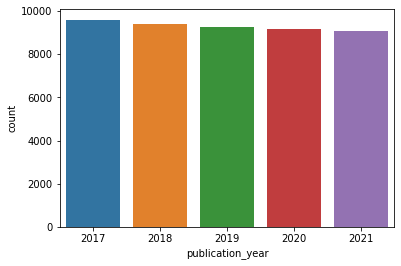

In [23]:
sns.countplot(data = df1_clean, x="publication_year")

In [28]:
categories=[]
for item in df1_clean['concepts_level_0'].values:
    categories.extend(item)
unique=list(set(categories))
len(unique)

19

In [29]:
unique

['Art',
 'Sociology',
 'Business',
 'Philosophy',
 'Environmental science',
 'Economics',
 'Political science',
 'Engineering',
 'Psychology',
 'Geology',
 'Mathematics',
 'History',
 'Materials science',
 'Physics',
 'Chemistry',
 'Geography',
 'Medicine',
 'Computer science',
 'Biology']

In [30]:
s = df1_clean['concepts_level_0']

In [31]:
dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_64503/2091366517.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_64503/2091366517.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)


In [32]:
final = pd.concat([df1_clean, dummies], axis=1).drop(columns=['concepts', 'concepts_level_0'])

In [33]:
final.head()

,id,title,publication_year,publication_date,month_year,Art,Biology,Business,Chemistry,Computer science,...,Geology,History,Materials science,Mathematics,Medicine,Philosophy,Physics,Political science,Psychology,Sociology
0,https://openalex.org/W2511949746,EAU-ESTRO-SIOG Guidelines on Prostate Cancer. ...,2017,2017-04-01,2017-04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,https://openalex.org/W2805354595,Atezolizumab for First-Line Treatment of Metas...,2018,2018-06-04,2018-06,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,https://openalex.org/W4205946977,Neoliberalizing Space,2020,2020-06-22,2020-06,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,https://openalex.org/W2796277309,Review on nanoparticles and nanostructured mat...,2018,2018-04-03,2018-04,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,https://openalex.org/W2969802526,A global view of hepatocellular carcinoma: tre...,2019,2019-08-22,2019-08,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
grouped = final.groupby(['publication_year'])

In [137]:
grouped_months = final.groupby(['month_year'])

In [144]:
grouped_months

In [152]:
new_df=pd.DataFrame()
for value in unique:
    new_df[value]=grouped[value].sum()

In [141]:
df_months=pd.DataFrame()
for value in unique:
    df_months[value]=grouped_months[value].sum()

In [156]:
df_months = df_months.apply(pd.to_numeric)

In [50]:
range(len(new_df))

5

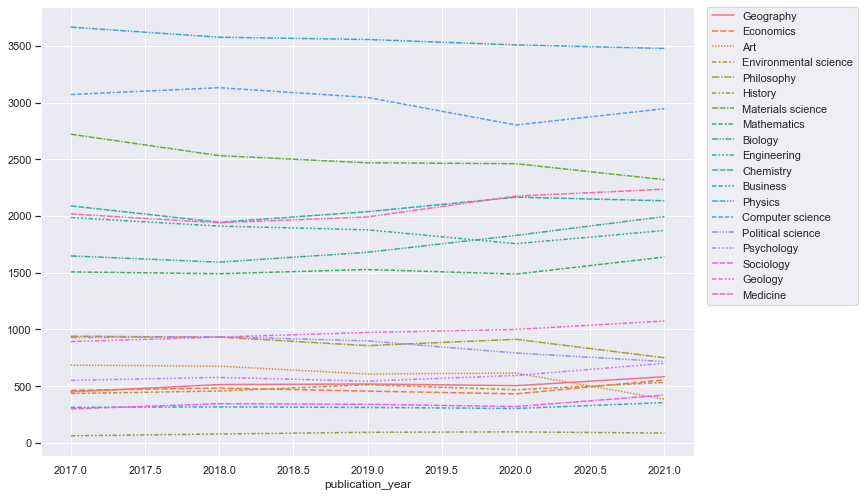

In [153]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
g = sns.lineplot(data=new_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# g.set_xticks([1,2,3,4,5]) # <--- set the ticks first
# g.set_xticklabels([2017,2018,2019,2020,2021])
# plt.xticks(range(len(new_df)),['2017','2018','2019','2020','2021'])
# sns.set(rc={"xtick.bottom" : False, "ytick.left" : True})


TypeError: Invalid object type at position 0

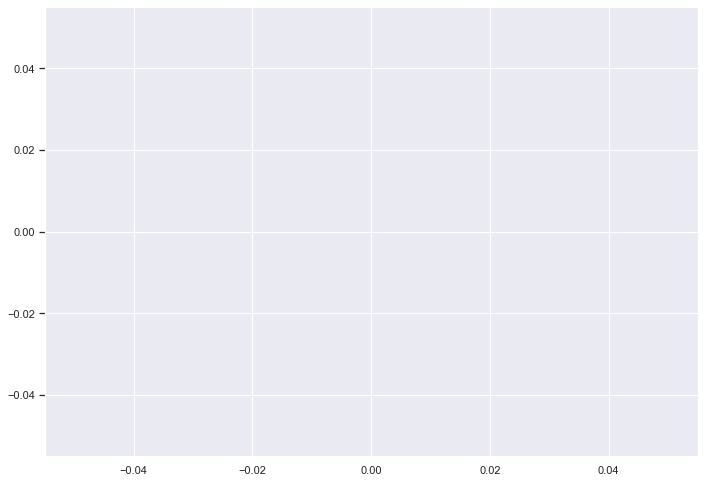

In [157]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
g = sns.lineplot(data=df_months)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# g.set_xticks([1,2,3,4,5]) # <--- set the ticks first
# g.set_xticklabels([2017,2018,2019,2020,2021])
# plt.xticks(range(len(new_df)),['2017','2018','2019','2020','2021'])
# sns.set(rc={"xtick.bottom" : False, "ytick.left" : True})


In [37]:
social=['Economics', 'Sociology', 'Political science', 'Business', 'Geography']
earth_science=['Medicine','Biology', 'Environmental science', 'Geology', 'Psychology', 'Materials science']
engineering_maths=['Engineering', 'Computer science', 'Chemistry', 'Physics', 'Mathematics']
humanities=['Philosophy', 'History', 'Art']

In [38]:
new_df_social=new_df[social]
new_df_earth=new_df[earth_science]
new_df_engineering=new_df[engineering_maths]
new_df_humanities=new_df[humanities]

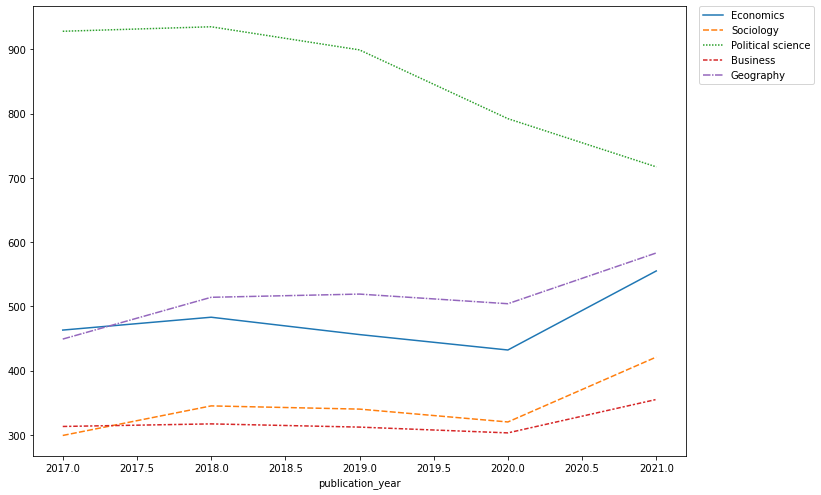

In [39]:

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_social)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


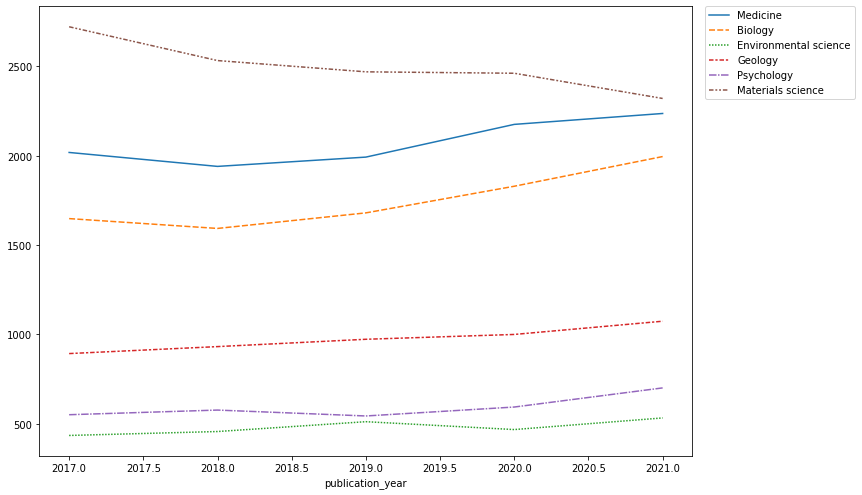

In [40]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_earth)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

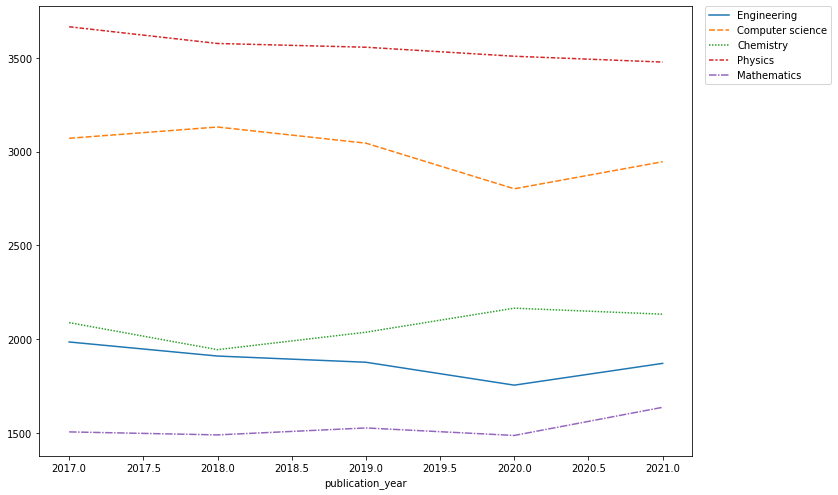

In [41]:

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_engineering)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


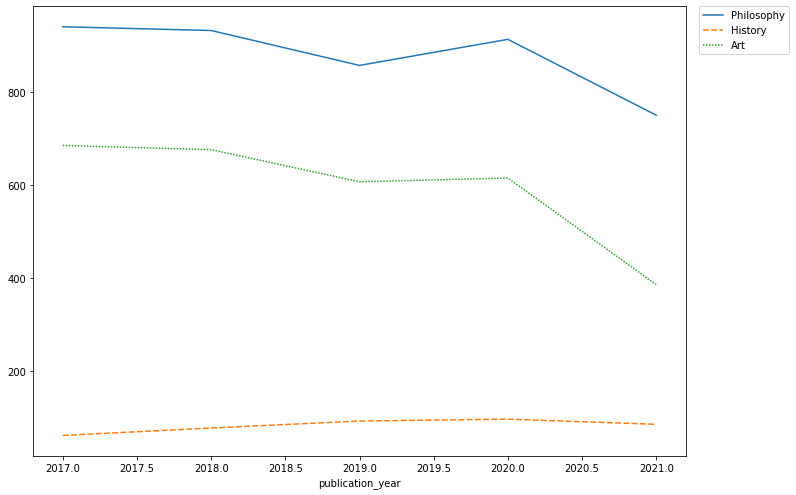

In [42]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_humanities)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Exercise 2

1. Get all the publications that have at least 2 authors in them
2.  Notions of centrality: 
 -  Connectedness 1: How many publications with grenoble authors they have
 - Connectedness 2: With how many different grenoble authors they have published
 -  A factor of the two
 -  A factor of the first two with the average impact factor of their publications with Grenoble authors
 -  A recursive notion: number of connections with connected authors
3. Download the grenoble authors and check their cited scores. See if there is a correlation with connectedness
 

In [24]:
df2=df[['id', 'authorships',]]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           49579 non-null  object
 1   authorships  49579 non-null  object
dtypes: object(2)
memory usage: 774.8+ KB


## Connectedness 1

In [26]:
def num_grenoble_authors(row):
    return len([author for author in row['authorships'] if (author['raw_affiliation_string'] is not None) and ("grenoble" in author['raw_affiliation_string'].lower())])

In [27]:
df2['num_grenoble_authors'] = df2.apply(num_grenoble_authors, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/4223153541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_grenoble_authors'] = df2.apply(num_grenoble_authors, axis=1)


In [28]:
df2['is_connected'] = df2.apply(lambda row: 1 if num_grenoble_authors(row)>1 else 0, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/626185418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_connected'] = df2.apply(lambda row: 1 if num_grenoble_authors(row)>1 else 0, axis=1)


In [29]:
def extract_author_ids(row):
    authors = [author['author']['id'] for author in row['authorships']]
    return authors

df2['authors'] = df2.apply(lambda row: extract_author_ids(row), axis=1) 

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/316629148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['authors'] = df2.apply(lambda row: extract_author_ids(row), axis=1)


In [30]:
flat_list = [item for items in df2.authorships.values for item in items if (item['raw_affiliation_string'] is not None) and ('grenoble' in item['raw_affiliation_string'].lower())]


In [57]:
authors_sim = [{'author_id': item['author']['id'],
  'name':item['author']['display_name']}
 for item in flat_list]

In [72]:
grenoble_authors = pd.DataFrame.from_dict(authors_sim)

In [73]:
grenoble_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115592 entries, 0 to 115591
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   author_id  115592 non-null  object
 1   name       115592 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [74]:
grenoble_authors = grenoble_authors.drop_duplicates(ignore_index=True)

In [75]:
grenoble_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36958 entries, 0 to 36957
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  36958 non-null  object
 1   name       36958 non-null  object
dtypes: object(2)
memory usage: 577.6+ KB


In [76]:
work_author_pairs = df2[df2['is_connected']==1][['id', 'authors']]

In [77]:
work_author_pairs = work_author_pairs.explode('authors')

In [78]:
grenoble_work_author_pairs = work_author_pairs[work_author_pairs['authors'].isin(grenoble_authors['author_id'])]

In [79]:
count_works = grenoble_work_author_pairs.groupby('authors').count().reset_index()
count_works

,authors,id
0,https://openalex.org/A1002805135,2
1,https://openalex.org/A1007915466,6
2,https://openalex.org/A100908830,1
3,https://openalex.org/A1009761877,4
4,https://openalex.org/A1015310080,1
...,...,...
28519,https://openalex.org/A974871389,17
28520,https://openalex.org/A975039927,1
28521,https://openalex.org/A97906723,6
28522,https://openalex.org/A985776687,4


In [66]:
def get_connectedness1(row):
    author_id = row['author_id']
    if not count_works['id'][count_works['authors']==author_id].empty:
        count = count_works['id'][count_works['authors']==author_id].values[0]
        return count
    else:
        return 0

In [80]:
grenoble_authors['connectedness_1']=grenoble_authors.apply(get_connectedness1, axis=1)

In [81]:
grenoble_authors[grenoble_authors.name=="Jean-Louis Pépin"]

,author_id,name,connectedness_1
8,https://openalex.org/A2596381244,Jean-Louis Pépin,206
13161,https://openalex.org/A4227283002,Jean-Louis Pépin,1
19358,https://openalex.org/A4202217154,Jean-Louis Pépin,1
32826,https://openalex.org/A4260292885,Jean-Louis Pépin,1
35347,https://openalex.org/A4261509675,Jean-Louis Pépin,1


## Connectedness 2

In [82]:
def get_connectedness2(row):
    author_id = row['author_id']
    works = grenoble_work_author_pairs['id'][grenoble_work_author_pairs['authors']==author_id]
    num_colabs = len(np.unique((grenoble_work_author_pairs['authors'][(grenoble_work_author_pairs['authors']!=author_id) & grenoble_work_author_pairs['id'].isin(list(works))]).values))
    return num_colabs

In [83]:
grenoble_authors['connectedness_2']=grenoble_authors.apply(get_connectedness2, axis=1)
#takes 30 minutes. save in csv at this point

In [84]:
grenoble_authors.to_csv('data/grenoble_authors.csv', index=False)

In [34]:
grenoble_authors = pd.read_csv('data/grenoble_authors.csv')  

In [35]:
grenoble_authors

,author_id,name,connectedness_1,connectedness_2
0,https://openalex.org/A2081927895,Michel Bolla,1,8
1,https://openalex.org/A2967507403,Christian A. Thomas,0,0
2,https://openalex.org/A4208415029,Frédéric Bally,0,0
3,https://openalex.org/A2050409607,Alain Dufresne,38,36
4,https://openalex.org/A2061986354,Pierre Hainaut,23,103
...,...,...,...,...
36953,https://openalex.org/A4207761270,Isabelle Lordey,1,6
36954,https://openalex.org/A4208119760,Rolando Rebois,1,4
36955,https://openalex.org/A4225885156,"Meulemans, Germain",0,0
36956,https://openalex.org/A4227555375,Yassine Laguel,0,0


## Connectedness 3

In [36]:
grenoble_authors['connectedness_3'] = grenoble_authors['connectedness_1'] * grenoble_authors['connectedness_2']

In [37]:
grenoble_authors

,author_id,name,connectedness_1,connectedness_2,connectedness_3
0,https://openalex.org/A2081927895,Michel Bolla,1,8,8
1,https://openalex.org/A2967507403,Christian A. Thomas,0,0,0
2,https://openalex.org/A4208415029,Frédéric Bally,0,0,0
3,https://openalex.org/A2050409607,Alain Dufresne,38,36,1368
4,https://openalex.org/A2061986354,Pierre Hainaut,23,103,2369
...,...,...,...,...,...
36953,https://openalex.org/A4207761270,Isabelle Lordey,1,6,6
36954,https://openalex.org/A4208119760,Rolando Rebois,1,4,4
36955,https://openalex.org/A4225885156,"Meulemans, Germain",0,0,0
36956,https://openalex.org/A4227555375,Yassine Laguel,0,0,0


In [38]:
grenoble_authors.nlargest(10, 'connectedness_3')

,author_id,name,connectedness_1,connectedness_2,connectedness_3
8,https://openalex.org/A2596381244,Jean-Louis Pépin,206,220,45320
2037,https://openalex.org/A2196954048,Gerard Ghibaudo,148,249,36852
173,https://openalex.org/A2420782966,Renaud Tamisier,180,179,32220
1397,https://openalex.org/A1975902673,Jean-François Timsit,130,207,26910
613,https://openalex.org/A2308027254,J.M. Hartmann,101,248,25048
205,https://openalex.org/A1955230402,Yohann Couté,97,244,23668
1430,https://openalex.org/A2974844775,Maud Vinet,88,231,20328
1851,https://openalex.org/A2171459722,Laurence Bouillet,94,203,19082
1429,https://openalex.org/A1916288200,Sylvain Barraud,92,177,16284
1175,https://openalex.org/A2577985073,Jean-Luc Bosson,60,255,15300


# Exercise 3

In [475]:
df3 = df[['id', 'title', 'abstract_inverted_index']]

In [476]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       49579 non-null  object
 1   title                    49572 non-null  object
 2   abstract_inverted_index  40226 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [477]:
df3 = df3.dropna().reset_index().drop(columns='index')

In [478]:
df3 = df3[df3['abstract_inverted_index']!={}].reset_index().drop(columns='index')
#some indexs are empty dictionaries

In [479]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40211 entries, 0 to 40210
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       40211 non-null  object
 1   title                    40211 non-null  object
 2   abstract_inverted_index  40211 non-null  object
dtypes: object(3)
memory usage: 942.6+ KB


In [480]:
df3 = df3.drop_duplicates(subset=['title'], ignore_index=True)

In [481]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39409 non-null  object
 1   title                    39409 non-null  object
 2   abstract_inverted_index  39409 non-null  object
dtypes: object(3)
memory usage: 923.8+ KB


## Compose index

In [482]:
def compose_abstract(row):
    inverted_index=row['abstract_inverted_index']
    
    num_to_word={}
    for key, values in inverted_index.items():
        for value in values:
            num_to_word[value]=key

    abstract=[]
    k=0
    while k <= max(num_to_word.keys()):
        if k in num_to_word: 
            abstract.append(num_to_word[k])
        k+=1

    return ' '.join(abstract)


In [483]:
df3['abstract']=df3.apply(compose_abstract, axis=1)

KeyboardInterrupt: 

In [ ]:
def detect_lang(x):
    try:
        return str(detect(x))
    except:
        return 'No language detected.'
        print(x)

In [ ]:
df3['lang']=df3.abstract.apply(detect_lang)

In [205]:
df3.to_csv('data/abstracts_langs.csv', index=False)

In [484]:
df3 = pd.read_csv('data/abstracts_langs.csv')  

In [485]:
df3.lang.value_counts()

en                       34619
fr                        4613
es                          79
it                          23
pt                          23
de                          14
ca                          13
nl                           8
ru                           6
ro                           3
pl                           3
sv                           1
cs                           1
No language detected.        1
cy                           1
tl                           1
Name: lang, dtype: int64

In [486]:
df3_eng = df3[df3.lang=='en']
#in reality I would have translated things

In [487]:
df3_eng = df3_eng.reset_index().drop(columns='index')

## Extract keywords

In [294]:
#for keyword extraction:
#ttps://www.analyticsvidhya.com/blog/2022/01/four-of-the-easiest-and-most-effective-methods-of-keyword-extraction-from-a-single-text-using-python/

In [208]:
def clean_text(text_data):
    
    tokens = tokenizer.tokenize(text_data)
    
    lowercased = [w.lower() for w in tokens]
    
    no_sw = [w for w in lowercased if (not w in stop_words_en and not w in stop_words_fr)]
    
    lemmas = [lemmatizer.lemmatize(word) for word in no_sw]
    
    no_punct = [w for w in lemmas if w.isalpha()]#if more time, avoid deleting dashes
    
    final = [w for w in no_punct if len(w)>2]
    
    return ' '.join(final)

In [209]:
df3_eng['clean_abstract']=df3_eng['abstract'].apply(clean_text)

/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_64503/725201692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clean_abstract']=df3['abstract'].apply(clean_text)


In [210]:
df3_eng['clean_title']=df3_eng['title'].apply(clean_text)

/var/folders/8t/pdc266556nvbq2phrrf21cd00000gn/T/ipykernel_64503/3166732752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['clean_title']=df3['title'].apply(clean_text)


In [211]:
df3_eng.head()

,id,title,abstract_inverted_index,abstract,lang,clean_abstract,clean_title
0,https://openalex.org/W2511949746,"EAU-ESTRO-SIOG Guidelines on Prostate Cancer. Part 1: Screening, Diagnosis, and Local Treatment with Curative Intent","{'To': [0], 'present': [1, 392], 'a': [2, 49, 74, 124, 148, 204, 253, 462], 'summary': [3], 'of': [4, 8, 12, 26, 40, 52, 64, 68, 77, 103, 147, 153, 169, 223, 231, 243, 314, 319, 363, 371, 400, 412, 483], 'the': [5, 9, 53, 62, 78, 95, 98, 131, 145, 154, 167, 173, 181, 199, 229, 241, 261, 293, 312, 332, 339, 346, 352, 360, 368, 380, 396, 410, 420], '2016': [6, 326, 386], 'version': [7, 376], 'European': [10, 16, 353], 'Association': [11], 'Urology': [13], '(EAU)': [14], '-': [15, 23], 'Society': [17, 25, 102, 354, 362], 'for': [18, 87, 338, 355, 456], 'Radiotherapy': [19, 356], '&': [20], 'Oncology': [21, 28, 358, 365], '(ESTRO)': [22], 'International': [24, 101, 361], 'Geriatric': [27, 364], '(SIOG)': [29], 'Guidelines': [30, 328, 391], 'on': [31, 73, 264, 329, 395, 419], 'screening,': [32, 431], 'diagnosis,': [33, 315, 397], 'and': [34, 61, 89, 127, 134, 161, 177, 228, 278, 302, 317, 336, 357, 359, 366, 383, 398, 407, 471], 'local': [35, 208], 'treatment': [36, 178, 255, 318, 399], 'with': [37, 217, 257, 271, 415, 464], 'curative': [38], 'intent': [39], 'clinically': [41, 401], 'localised': [42, 320, 402], 'prostate': [43, 403], 'cancer': [44], '(PCa).The': [45], 'working': [46], 'panel': [47], 'performed': [48], 'literature': [50], 'review': [51, 76], 'new': [54], 'data': [55, 282], '(2013-2015).': [56], 'The': [57, 221, 325], 'guidelines': [58, 349], 'were': [59, 70], 'updated': [60, 393], 'levels': [63], 'evidence': [65], 'and/or': [66], 'grades': [67], 'recommendation': [69], 'added': [71, 83], 'based': [72, 263], 'systematic': [75, 193], 'evidence.BRCA2': [79], 'mutations': [80], 'have': [81, 235], 'been': [82, 236, 418], 'as': [84, 238, 240, 267, 269, 481], 'risk': [85, 149], 'factors': [86, 434], 'early': [88, 141], 'aggressive': [90], 'disease.': [91], 'In': [92, 405], 'addition': [93], 'to': [94, 165, 214, 291, 426, 445], 'Gleason': [96], 'score,': [97], 'five-tier': [99], '2014': [100], 'Urological': [104], 'Pathology': [105], 'grading': [106], 'system': [107], 'should': [108, 458], 'now': [109], 'be': [110, 138, 163, 215, 424, 437, 459, 479], 'provided.': [111], 'Systematic': [112], 'screening': [113, 457], 'is': [114, 252, 276, 322, 377], 'still': [115, 284, 305], 'not': [116], 'recommended.': [117], 'Instead,': [118], 'an': [119, 288, 427, 475, 484], 'individual': [120], 'risk-adapted': [121, 486], 'strategy': [122], 'following': [123], 'detailed': [125], 'discussion': [126, 463], 'taking': [128], 'into': [129], 'account': [130], 'patient's': [132], ...}","To present a summary of the 2016 version of the European Association of Urology (EAU) - European Society for Radiotherapy & Oncology (ESTRO) - International Society of Geriatric Oncology (SIOG) Guidelines on screening, diagnosis, and local treatment with curative intent of clinically localised prostate cancer (PCa).The working panel performed a literature review of the new data (2013-2015). The guidelines were updated and the levels of evidence and/or grades of recommendation were added based on a systematic review of the evidence.BRCA2 mutations have been added as risk factors for early and aggressive disease. In addition to the Gleason score, the five-tier 2014 International Society of Urological Pathology grading system should now be provided. Systematic screening is still not recommended. Instead, an individual risk-adapted strategy following a detailed discussion and taking into account the patient's wishes and life expectancy must be considered. An early prostate-specific antigen test, the use of a risk calculator, or one of the promising biomarker tools are being investigated and might be able to limit the overdetection of insignificant PCa. Breaking the link between diagnosis and treatment may lower the overtreatment risk. Multi

In [214]:
df3_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34619 entries, 0 to 34618
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       34619 non-null  object
 1   title                    34619 non-null  object
 2   abstract_inverted_index  34619 non-null  object
 3   abstract                 34619 non-null  object
 4   lang                     34619 non-null  object
 5   clean_abstract           34619 non-null  object
 6   clean_title              34619 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [215]:
def extract_keywords(row):
    kwds_abs = keywords.keywords(row['clean_abstract'], scores=False).split()[0:10]
    kwds_title = keywords.keywords(row['clean_title'], scores=False).split()[0:10]
    return list(set(kwds_abs+kwds_title))

In [216]:
df3_eng['keywords'] = df3_eng.apply(extract_keywords, axis=1)

In [217]:
df3_eng.to_csv('data/extracted_keywords.csv', index=False)

In [218]:
df3_eng = pd.read_csv('data/extracted_keywords.csv')  

In [220]:
df3_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34619 entries, 0 to 34618
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       34619 non-null  object
 1   title                    34619 non-null  object
 2   abstract_inverted_index  34619 non-null  object
 3   abstract                 34619 non-null  object
 4   lang                     34619 non-null  object
 5   clean_abstract           34619 non-null  object
 6   clean_title              34598 non-null  object
 7   keywords                 34619 non-null  object
dtypes: object(8)
memory usage: 2.1+ MB


In [221]:
flat_kwds = [item for items in [ast.literal_eval(item) for item in df3_eng.keywords.values] for item in items]


In [222]:
common_academic_ws = 'ability, absence, account, achievement, act, action, activity, addition, adoption, adult, advance, advantage, advice, age, aim, alternative, amount, analogy, analysis, application, approach, argument, aspect, assertion, assessment, assistance, association, assumption, attempt, attention, attitude, author, awareness, balance, basis, behaviour, being, belief, benefit, bias, birth, capacity, case, category, cause, centre, challenge, change, character, characteristic, choice, circumstance, class, classification, code, colleague, combination, commitment, committee, communication, community, comparison, complexity, compromise, concentration, concept, conception, concern, conclusion, condition, conduct, conflict, consensus, consequence, consideration, constraint, construction, content, contradiction, contrast, contribution, control, convention, correlation, country, creation, crisis, criterion, criticism, culture, damage, data, debate, decision, decline, defence, definition, degree, demand, description, destruction, determination, development, difference, difficulty, dilemma, dimension, disadvantage, discovery, discrimination, discussion, distinction, diversity, division, doctrine, effect, effectiveness, element, emphasis, environment, error, essence, establishment, evaluation, event, evidence, evolution, examination, example, exception, exclusion, existence, expansion, experience, experiment, explanation, exposure, extent, extreme, fact, factor, failure, feature, female, figure, finding, force, form, formation, function, future, gain, group, growth, guidance, guideline, hypothesis, idea, identity, impact, implication, importance, improvement, increase, indication, individual, influence, information, insight, instance, institution, integration, interaction, interest, interpretation, intervention, introduction, investigation, isolation, issue, kind, knowledge, lack, learning, level, likelihood, limit, limitation, link, list, literature, logic, loss, maintenance, majority, male, manipulation, mankind, material, means, measure, medium, member, method, minority, mode, model, motivation, movement, need, network, norm, notion, number, observation, observer, occurrence, operation, opportunity, option, organisation, outcome, output, parallel, parent, part, participant, past, pattern, percentage, perception, period, person, personality, perspective, phenomenon, point, policy, population, position, possibility, potential, practice, presence, pressure, problem, procedure, process, production, programme, progress, property, proportion, proposition, protection, provision, publication, purpose, quality, question, range, rate, reader, reality, reason, reasoning, recognition, reduction, reference, relation, relationship, relevance, report, representative, reproduction, requirement, research, resistance, resolution, resource, respect, restriction, result, review, rise, risk, role, rule, sample, scale, scheme, scope, search, section, selection, sense, separation, series, service, set, sex, shift, significance, similarity, situation, skill, society, solution, source, space, spread, standard, statistics, stimulus, strategy, stress, structure, subject, success, summary, support, survey, system, target, task, team, technique, tendency, tension, term, theme, theory, tolerance, topic, tradition, transition, trend, type, uncertainty, understanding, unit, use, validity, value, variation, variety, version, view, viewpoint, volume, whole, work, world, accept, account (for), achieve, acquire, act, adapt, adopt, advance, advocate, affect, aid, aim, allocate, allow, alter, analyse, appear, apply, argue, arise, assert, assess, assign, associate, assist, assume, attain, attempt, attend, attribute, avoid, base, be, become, benefit, can, cause, characterise, choose, cite, claim, clarify, classify, coincide, combine, compare, compete, comprise, concentrate, concern, conclude, conduct, confine, conform, connect, consider, consist, constitute, construct, contain, contrast, contribute, control, convert, correspond, create, damage, deal, decline, define, demonstrate, depend, derive, describe, design, destroy, determine, develop, differ, differentiate, diminish, direct, discuss, display, distinguish, divide, dominate, effect, eliminate, emerge, emphasize, employ, enable, encounter, encourage, enhance, ensure, establish, evaluate, evolve, examine, exceed, exclude, exemplify, exist, expand, experience, explain, expose, express, extend, facilitate, fail, favour, finance, focus, follow, form, formulate, function, gain, generate, govern, highlight, identify, illustrate, imply, impose, improve, include, incorporate, increase, indicate, induce, influence, initiate, integrate, interpret, introduce, investigate, involve, isolate, label, lack, lead, limit, link, locate, maintain, may, measure, neglect, note, obtain, occur, operate, outline, overcome, participate, perceive, perform, permit, pose, possess, precede, predict, present, preserve, prevent, produce, promote, propose, prove, provide, publish, pursue, quote, receive, record, reduce, refer, reflect, regard, regulate, reinforce, reject, relate, rely, remain, remove, render, replace, report, represent, reproduce, require, resolve, respond, restrict, result, retain, reveal, seek, select, separate, should, show, solve, specify, state, stimulate, strengthen, stress, study, submit, suffer, suggest, summarise, supply, support, sustain, tackle, tend, term, transform, treat, undermine, undertake, use, vary, view, write, yield, absolute, abstract, acceptable, accessible, active, actual, acute, additional, adequate, alternative, apparent, applicable, appropriate, arbitrary, available, average, basic, central, certain, clear, common, competitive, complete, complex, comprehensive, considerable, consistent, conventional, correct, critical, crucial, dependent, detailed, different, difficult, distinct, dominant, early, effective, equal, equivalent, essential, evident, excessive, experimental, explicit, extensive, extreme, far, favourable, final, fixed, following, formal, frequent, fundamental, future, general, great, high, human, ideal, identical, immediate, important, inadequate, incomplete, independent, indirect, individual, inferior, influential, inherent, initial, interesting, internal, large, late, leading, likely, limited, local, logical, main, major, male, maximum, mental, minimal, minor, misleading, modern, mutual, natural, necessary, negative, new, normal, obvious, original, other, overall, parallel, partial, particular, passive, past, permanent, physical, positive, possible, potential, practical, present, previous, primary, prime, principal, productive, profound, progressive, prominent, psychological, radical, random, rapid, rational, real, realistic, recent, related, relative, relevant, representative, responsible, restricted, scientific, secondary, selective, separate, severe, sexual, significant, similar, simple, single, so-called, social, special, specific, stable, standard, strict, subsequent, substantial, successful, successive, sufficient, suitable, surprising, symbolic, systematic, theoretical, total, traditional, true, typical, unique, unlike, unlikely, unsuccessful, useful, valid, valuable, varied, various, visual, vital, wide, widespread, above, accordingly, accurately, adequately, also, approximately, at best, basically, clearly, closely, commonly, consequently, considerably, conversely, correctly, directly, effectively, e.g., either, equally, especially, essentially, explicitly, extremely, fairly, far, for example, for instance, frequently, fully, further, generally, greatly, hence, highly, however, increasingly, indeed, independently, indirectly, inevitably, initially, in general, in particular, largely, less, mainly, more, moreover, most, namely, necessarily, normally, notably, often, only, originally, over, partially, particularly, potentially, previously, primarily, purely, readily, recently, relatively, secondly, significantly, similarly, simply, socially, solely somewhat, specifically, strongly, subsequently, successfully, thereby, therefore, thus, traditionally, typically, ultimately, virtually, wholly, widely, according to, although, an, as, as opposed to, as to, as well as, because, because of, between, both, by, contrary to, depending on, despite, due to, during, each, even though, fewer, first, former, from, for, given that, in, in addition to, in common with, in favour of, in relation to, in response to, in terms of, in that, in the light of, including, its, itself, latter, less, little, many, most, of, or, other than, per, prior to, provided, rather than, same, second, several, since, some, subject to, such, such as, than, that, the, their, themselves, these, third, this, those, to, unlike, upon, versus, whereas, whether, whether or not, which, within'
# Comes from here: https://uclouvain.be/en/research-institutes/ilc/cecl/the-academic-keyword-list-akl.html
# if more time, refine this list

In [223]:
common_academic_ws = common_academic_ws.split(", ")

In [224]:
clean_kwds = [word for word in flat_kwds if word not in common_academic_ws]

In [225]:
from collections import Counter
 
def top_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(10)
   
print(top_frequent(clean_kwds))

[('patient', 2093), ('magnetic', 1377), ('cell', 1092), ('temperature', 1065), ('structural', 1016), ('measurement', 984), ('phase', 966), ('energy', 930), ('performance', 883), ('proposed', 856)]


In [226]:
common_academic_ws.extend(['proposed', 'based', 'observed', 'associated', 'paper', 'studied', 'compared', 'provides'])

In [227]:
clean_kwds = [word for word in flat_kwds if word not in common_academic_ws]
print(top_frequent(clean_kwds))

[('patient', 2093), ('magnetic', 1377), ('cell', 1092), ('temperature', 1065), ('structural', 1016), ('measurement', 984), ('phase', 966), ('energy', 930), ('performance', 883), ('surface', 796)]


In [ ]:
#if more time: ngrams, translate french into English for normalization, refine list, other algorithms for keyword extraction


# Exercise 4

In [228]:
df4 = final[final["Medicine"]==1].reset_index().drop(columns='index')

In [229]:
df4 = df4[['id']]

In [230]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10361 non-null  object
dtypes: object(1)
memory usage: 81.1+ KB


In [231]:
other = df3[['id', 'abstract']]
other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34619 entries, 0 to 34618
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        34619 non-null  object
 1   abstract  34619 non-null  object
dtypes: object(2)
memory usage: 541.0+ KB


In [232]:
joint = df4.join(other.set_index('id'), on='id', how='inner')
#the dataframe is smaller than all those that belonged to the concept Medicine, because there were some empty abstracts

In [233]:
joint.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7170 entries, 0 to 10360
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7170 non-null   object
 1   abstract  7170 non-null   object
dtypes: object(2)
memory usage: 168.0+ KB


In [73]:
nlp = spacy.load("en_ner_bc5cdr_md")

In [234]:
def get_diseases(text):
    doc = nlp(text)
    pred = doc.ents
    diseases = [word.text for word in pred if word.label_=='DISEASE']
    return diseases

In [236]:
joint['diseases'] = joint['abstract'].apply(get_diseases)

In [237]:
joint.to_csv('data/extracted_diseases.csv', index=False)

In [238]:
df4 = pd.read_csv('data/extracted_diseases.csv')

In [255]:
dis = [item for items in joint.diseases for item in items]
dis

['prostate cancer',
 'aggressive disease',
 'hypofractionation',
 'Prostate Cancer',
 'prostate cancer',
 'PCa',
 'nonsquamous non-small-cell lung cancer',
 'NSCLC',
 'tumor',
 'death',
 'death',
 'death',
 'NSCLC',
 'Hepatocellular carcinoma',
 'HCC',
 'cancer-related death',
 'HCC',
 'chronic hepatitis B',
 'alcohol addiction',
 'metabolic liver disease',
 'nonalcoholic fatty liver disease',
 'HCC',
 'HCC',
 'tumour',
 'liver dysfunction',
 'intermediate-stage cancer',
 'hepatitis',
 'HCC',
 'Pain',
 'Agitation',
 'Delirium',
 'Pain',
 'Delirium',
 'Pain',
 'Delirium',
 'Pain',
 'Delirium',
 'critically ill',
 'Pain',
 'Delirium',
 'atrial fibrillation',
 'atrial fibrillation',
 'NOACs',
 'stroke',
 'atrial fibrillation',
 'NOACs',
 'NOACs',
 'NOACs',
 'NOACs',
 'NOACs',
 'liver disease',
 'NOACs',
 'overdose',
 'bleeding',
 'bleeding',
 'bleeding',
 'AF',
 'confusion',
 'acute stroke',
 'NOACs',
 'NOACs',
 'malignancy',
 'obstructive sleep apnoea',
 'disorder',
 'neurocognitive and 

In [267]:
not_diseases=['pain', 'death', 'deaths', 'toxicity']

In [268]:
def normalize_diseases(text_data):
    
    tokens = tokenizer.tokenize(text_data)
    
    lowercased = [w.lower() for w in tokens]
    
    only_dis = [w for w in lowercased if w not in not_diseases]
        
    lemmas = [lemmatizer.lemmatize(w) for w in only_dis]
    
    return ' '.join(lemmas)

In [269]:
clean_dis = [item for item in [normalize_diseases(item) for item in dis] if item!='']
clean_dis

['prostate cancer',
 'aggressive disease',
 'hypofractionation',
 'prostate cancer',
 'prostate cancer',
 'pca',
 'nonsquamous non-small-cell lung cancer',
 'nsclc',
 'tumor',
 'nsclc',
 'hepatocellular carcinoma',
 'hcc',
 'cancer-related',
 'hcc',
 'chronic hepatitis b',
 'alcohol addiction',
 'metabolic liver disease',
 'nonalcoholic fatty liver disease',
 'hcc',
 'hcc',
 'tumour',
 'liver dysfunction',
 'intermediate-stage cancer',
 'hepatitis',
 'hcc',
 'agitation',
 'delirium',
 'delirium',
 'delirium',
 'delirium',
 'critically ill',
 'delirium',
 'atrial fibrillation',
 'atrial fibrillation',
 'noacs',
 'stroke',
 'atrial fibrillation',
 'noacs',
 'noacs',
 'noacs',
 'noacs',
 'noacs',
 'liver disease',
 'noacs',
 'overdose',
 'bleeding',
 'bleeding',
 'bleeding',
 'af',
 'confusion',
 'acute stroke',
 'noacs',
 'noacs',
 'malignancy',
 'obstructive sleep apnoea',
 'disorder',
 'neurocognitive and cardiovascular sequela',
 'obstructive sleep apnoea',
 'obstructive sleep apnoea'

In [270]:
print(top_frequent(clean_dis))

[('tumor', 1035), ('cancer', 890), ('osa', 561), ('infection', 537), ('asthma', 465), ('copd', 317), ('trauma', 285), ('stroke', 276), ('diabetes', 261), ('pd', 261)]


# Task 5 (optional)

In [274]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [323]:
df5 = df3[['id','clean_abstract']].join(final.set_index('id'), on='id', how='inner')
df5 = df5.reset_index().drop(columns='index')

In [324]:
df5 = df5.drop(columns=['publication_year', 'publication_date'])

In [325]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34566 entries, 0 to 34565
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   id                     34566 non-null  object   
 1   clean_abstract         34566 non-null  object   
 2   title                  34566 non-null  object   
 3   month_year             34566 non-null  period[M]
 4   Art                    34566 non-null  uint8    
 5   Biology                34566 non-null  uint8    
 6   Business               34566 non-null  uint8    
 7   Chemistry              34566 non-null  uint8    
 8   Computer science       34566 non-null  uint8    
 9   Economics              34566 non-null  uint8    
 10  Engineering            34566 non-null  uint8    
 11  Environmental science  34566 non-null  uint8    
 12  Geography              34566 non-null  uint8    
 13  Geology                34566 non-null  uint8    
 14  History               

In [412]:
vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 2, 
                                 stop_words = 'english')
tfidf = vectorizer.fit_transform(df5["clean_abstract"])

In [296]:
vectorizer.get_feature_names_out()[:100]

array(['aaa', 'aaaa', 'aaab', 'aac', 'aacr', 'aae', 'aags', 'aaipi',
       'aaker', 'aao', 'aaos', 'aap', 'aapc', 'aar', 'aasm', 'aast',
       'aat', 'aatsr', 'aav', 'aba', 'abacus', 'abancay', 'abandon',
       'abandoned', 'abandoning', 'abandonment', 'abaqus', 'abasic',
       'abatacept', 'abatement', 'abb', 'abbie', 'abbot', 'abbott',
       'abbreviated', 'abbreviation', 'abbvie', 'abc', 'abcp', 'abd',
       'abdomen', 'abdominal', 'abdominoperineal', 'abduction',
       'abductive', 'abdullah', 'abel', 'abelian', 'aberrant',
       'aberrantly', 'aberration', 'abf', 'abg', 'abide', 'abidjan',
       'abies', 'ability', 'abiotic', 'abiotically', 'abl', 'ablated',
       'ablates', 'ablating', 'ablation', 'ablative', 'able', 'abmr',
       'abnormal', 'abnormality', 'abnormally', 'abo', 'aboard', 'aboi',
       'abolish', 'abolished', 'abolishes', 'abolishing', 'aborted',
       'abortion', 'abortive', 'aboulker', 'abound', 'aboveground',
       'abovementioned', 'abp', 'abpm',

In [413]:
len(vectorizer.get_feature_names_out())

38091

In [434]:
# Tweak the two parameters below
number_topics = 4
batch_size = 128

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=number_topics, 
                                learning_decay = 0.7,  # 0.7, 0.9
                                random_state = 23,
                                max_iter = 20,
                                batch_size=batch_size) 

lda.fit(tfidf)

LatentDirichletAllocation(max_iter=20, n_components=4, random_state=23)

In [305]:
# Log Likelihood: como más alta, mejor
print("Log Likelihood: ", lda.score(X_tfidf))

# Perplexity: como más baja, mejor
print("Perplexity: ", lda.perplexity(X_tfidf))

Log Likelihood:  -2064704.9980077809
Perplexity:  13757.49617616064


In [435]:
for index, topic in enumerate(lda.components_):
    print('Top 30 words for Topic {}'.format(index))
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for Topic 0
['ion', 'effect', 'layer', 'cell', 'spectroscopy', 'compound', 'interaction', 'complex', 'quantum', 'high', 'using', 'sub', 'surface', 'electron', 'structural', 'diffraction', 'field', 'film', 'scattering', 'crystal', 'neutron', 'state', 'transition', 'spin', 'material', 'property', 'phase', 'temperature', 'structure', 'magnetic']


Top 30 words for Topic 1
['propose', 'simulation', 'use', 'study', 'device', 'work', 'time', 'technology', 'energy', 'different', 'application', 'control', 'used', 'present', 'new', 'network', 'using', 'power', 'result', 'problem', 'algorithm', 'design', 'performance', 'proposed', 'based', 'data', 'approach', 'method', 'paper', 'model']


Top 30 words for Topic 2
['population', 'rate', 'level', 'effect', 'survival', 'response', 'tumor', 'analysis', 'factor', 'therapy', 'activity', 'month', 'result', 'specie', 'age', 'outcome', 'human', 'gene', 'protein', 'year', 'group', 'cancer', 'risk', 'associated', 'disease', 'clinical', 'treatm

In [436]:
doc_topic = lda.transform(tfidf)

In [437]:
tfidf.shape

(34566, 38091)

In [438]:
docs_topics={}
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    docs_topics[n]=topic_most_pr

In [439]:
df_docs_topics = pd.DataFrame.from_dict(docs_topics, orient='index')

In [440]:
df_docs_topics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34566 entries, 0 to 34565
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       34566 non-null  int64
dtypes: int64(1)
memory usage: 540.1 KB


In [441]:
df_docs_topics=df_docs_topics.rename(columns={0:'topic'})


In [453]:
df_docs_topics

,topic
0,2
1,2
2,0
3,2
4,2
...,...
34561,2
34562,1
34563,2
34564,3


In [442]:
dummies = pd.get_dummies(df_docs_topics.astype(str))

In [443]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34566 entries, 0 to 34565
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   topic_0  34566 non-null  uint8
 1   topic_1  34566 non-null  uint8
 2   topic_2  34566 non-null  uint8
 3   topic_3  34566 non-null  uint8
dtypes: uint8(4)
memory usage: 405.1 KB


In [444]:
final_df5 = df5.join(dummies, how='inner')

In [445]:
final_df5.drop(columns=['id','clean_abstract','title','month_year'])

,Art,Biology,Business,Chemistry,Computer science,Economics,Engineering,Environmental science,Geography,Geology,...,Medicine,Philosophy,Physics,Political science,Psychology,Sociology,topic_0,topic_1,topic_2,topic_3
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34561,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
34562,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34563,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34564,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [446]:
from sklearn.metrics.pairwise import pairwise_distances
#brief discussion on how to calculate correlation of binary variables: https://stackoverflow.com/questions/37003272/how-to-compute-jaccard-similarity-from-a-pandas-dataframe

In [447]:
trimmed_df=final_df5.drop(columns=['id','clean_abstract','title','month_year'])
jac_sim = 1 - pairwise_distances(trimmed_df.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=trimmed_df.columns, columns=trimmed_df.columns)

In [448]:
jac_sim

,Art,Biology,Business,Chemistry,Computer science,Economics,Engineering,Environmental science,Geography,Geology,...,Medicine,Philosophy,Physics,Political science,Psychology,Sociology,topic_0,topic_1,topic_2,topic_3
Art,1.000000,0.767430,0.950558,0.719898,0.642307,0.927761,0.756813,0.930597,0.933027,0.873836,...,0.779697,0.934878,0.547474,0.943991,0.920645,0.951108,0.729648,0.644709,0.760776,0.831366
Biology,0.767430,1.000000,0.761095,0.647023,0.537667,0.746745,0.607447,0.761789,0.762310,0.698490,...,0.683504,0.749523,0.437048,0.752734,0.733032,0.766678,0.599491,0.526066,0.764740,0.668345
Business,0.950558,0.761095,1.000000,0.703090,0.645577,0.933750,0.753370,0.914656,0.919748,0.853729,...,0.765376,0.922583,0.526905,0.943904,0.908234,0.939044,0.710004,0.665509,0.745183,0.808829
Chemistry,0.719898,0.647023,0.703090,1.000000,0.468900,0.687062,0.633628,0.701238,0.685095,0.658537,...,0.591188,0.694179,0.560146,0.693977,0.678268,0.700457,0.817595,0.428369,0.580831,0.637939
Computer science,0.642307,0.537667,0.645577,0.468900,1.000000,0.640658,0.643233,0.621044,0.629144,0.595817,...,0.505265,0.646155,0.512295,0.640340,0.633599,0.633918,0.457762,0.817885,0.462044,0.543974
Economics,0.927761,0.746745,0.933750,0.687062,0.640658,1.000000,0.737227,0.893768,0.897414,0.832668,...,0.754383,0.903952,0.526442,0.921686,0.892380,0.918909,0.694266,0.667187,0.732917,0.788636
Engineering,0.756813,0.607447,0.753370,0.633628,0.643233,0.737227,1.000000,0.745501,0.731499,0.705809,...,0.604611,0.734913,0.545507,0.742290,0.715588,0.740786,0.636666,0.663166,0.561968,0.669820
Environmental science,0.930597,0.761789,0.914656,0.701238,0.621044,0.893768,0.745501,1.000000,0.934734,0.890297,...,0.743852,0.894578,0.537320,0.903865,0.877857,0.910693,0.692993,0.618990,0.728577,0.847191
Geography,0.933027,0.762310,0.919748,0.685095,0.629144,0.897414,0.731499,0.934734,1.000000,0.880692,...,0.749233,0.899497,0.518573,0.912949,0.882023,0.918793,0.689984,0.631719,0.734016,0.834346
Geology,0.873836,0.698490,0.853729,0.658537,0.595817,0.832668,0.705809,0.890297,0.880692,1.000000,...,0.690100,0.840016,0.547793,0.845773,0.823468,0.851559,0.651854,0.580108,0.665741,0.874559


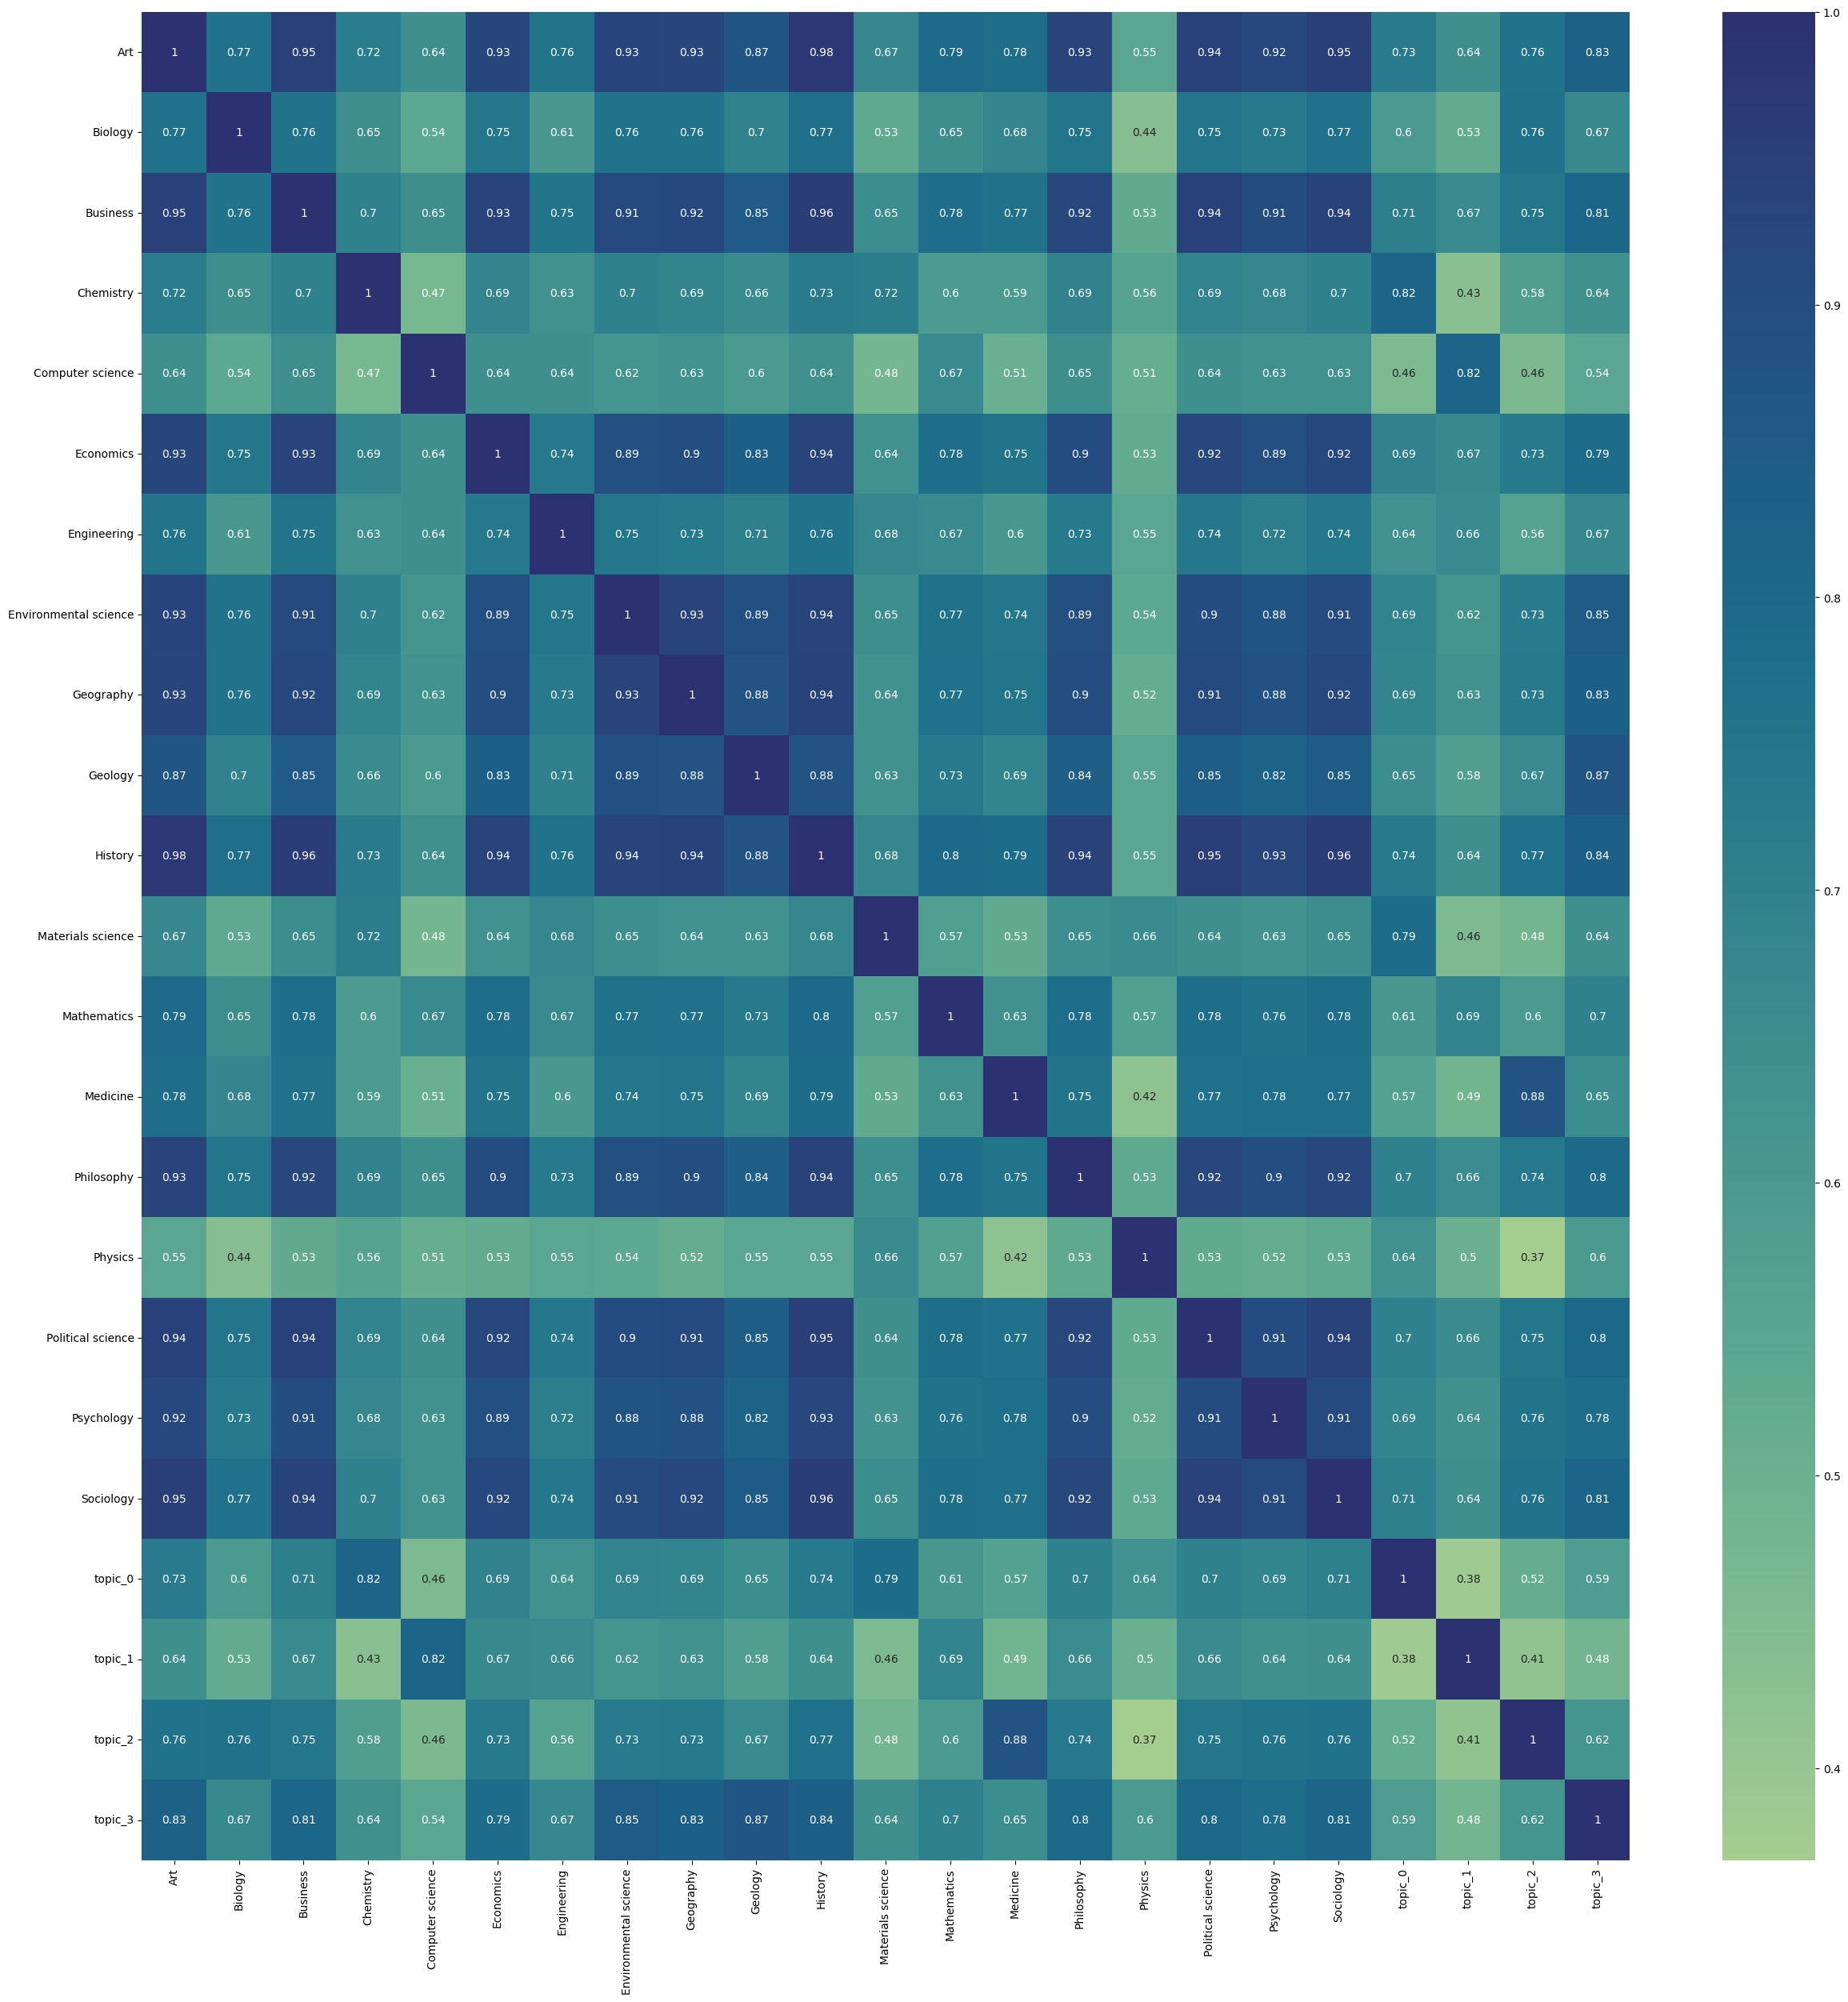

In [449]:
sns.heatmap(jac_sim, cmap="crest", annot=True)
plt.show()
plt.rcParams["figure.figsize"] = (30,30)

In [457]:
for n in range(4):
    topic = 'topic_{}'.format(n)
    top = list(jac_sim.nlargest(6, topic).index)
    print(topic, top)

topic_0 ['topic_0', 'Chemistry', 'Materials science', 'History', 'Art', 'Business']
topic_1 ['topic_1', 'Computer science', 'Mathematics', 'Economics', 'Business', 'Engineering']
topic_2 ['topic_2', 'Medicine', 'History', 'Biology', 'Art', 'Sociology']
topic_3 ['topic_3', 'Geology', 'Environmental science', 'History', 'Geography', 'Art']


In [ ]:
#topic 0: Chemistry-materials
#topic 1: CS-maths
#topic 2: Medicine-biology
#topic 3: Geology-environ-geography

#History and Art. And ing eneral humanities did not get well classified in the model

#with 4 topics was not bad. I'm trying with 5 now. to see if I can catch the humanities

#if more time, use other types of vectorization, a proper hyperparameter tuning of LDA

In [454]:
df_docs_topics.value_counts()

topic
1        12492
0         8868
2         7782
3         5424
dtype: int64

# Task 6 (optional)

In [459]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34619 entries, 0 to 34618
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       34619 non-null  object
 1   title                    34619 non-null  object
 2   abstract_inverted_index  34619 non-null  object
 3   abstract                 34619 non-null  object
 4   lang                     34619 non-null  object
 5   clean_abstract           34619 non-null  object
 6   clean_title              34598 non-null  object
 7   keywords                 34619 non-null  object
dtypes: object(8)
memory usage: 2.1+ MB


In [466]:
from deep_translator import GoogleTranslator

In [468]:
translated = GoogleTranslator(source='auto', target='en').translate("casa amarilla")  # output -> Weiter so, du bist großartig


In [469]:
translated

'yellow house'

In [489]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39409 non-null  object
 1   title                    39409 non-null  object
 2   abstract_inverted_index  39409 non-null  object
 3   abstract                 39407 non-null  object
 4   lang                     39409 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [493]:
df6 = df3
df6 = df6.dropna().reset_index().drop(columns='index')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39407 non-null  object
 1   title                    39407 non-null  object
 2   abstract_inverted_index  39407 non-null  object
 3   abstract                 39407 non-null  object
 4   lang                     39407 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [494]:
df6['clean_abstract']=df6['abstract'].apply(clean_text)

In [495]:
df6.lang.value_counts()

en                       34619
fr                        4613
es                          79
it                          23
pt                          23
de                          14
ca                          13
nl                           8
ru                           6
ro                           3
pl                           3
sv                           1
cs                           1
No language detected.        1
Name: lang, dtype: int64

In [543]:
def slice_text(text):
    fragments = [text[i:i+4000] for i in range(0, len(text), 4000)]
    return fragments

In [590]:
def translate_to_eng(row):
    if row.lang!='en':
        try:
            if len(row.clean_abstract)<5000:
                translated = GoogleTranslator(source='auto', target='en').translate(row['clean_abstract'])  # output -> Weiter so, du bist großartig
                return translated
            else:
                full_trans=[]
                chunks = slice_text(row.clean_abstract)
                for chunk in chunks:
                    translated = GoogleTranslator(source='auto', target='en').translate(chunk)
                    full_trans.append(translated)
                return ' '.join(full_trans)
        except:
            return 'Translation not available'
    else:
        return row['clean_abstract']
    

In [526]:
df6['clean_abstract'][(df6.lang!='en')&(df6.clean_abstract.str.len()>5000)]

29821    introduction role soignant transmet travers deux dimension domaine faire soin domaine perception prendre demarche soignante consiste donc associer technique soin qualites humaines professionnel quotidiennement confronte technique sein profession manipulateur electroradiologie medicale pose comme figure majeure dichotomie entre humanite technicite relation optimale relation authentique sans rapport hierarchique visant aussi bien donner cette optique professionnel sante congruent coherent propre personnalite pratique soins peut etre envisagee afin personnaliser soin cet outil communication represente veritable langage universel bâtisseur relation humaines base confiance technique distraction indispensable detourner patient preoccupation premiere telle maniere plus cooperant soins plus meme realiser rien desarme comme rire resume pensee rire constitue exercice musculaire ameliore respiration stimule systeme facilite digestion soulage douleur ameliore meme facultes nombreux bienfa

In [527]:
ex='introduction role soignant transmet travers deux dimension domaine faire soin domaine perception prendre demarche soignante consiste donc associer technique soin qualites humaines professionnel quotidiennement confronte technique sein profession manipulateur electroradiologie medicale pose comme figure majeure dichotomie entre humanite technicite relation optimale relation authentique sans rapport hierarchique visant aussi bien donner cette optique professionnel sante congruent coherent propre personnalite pratique soins peut etre envisagee afin personnaliser soin cet outil communication represente veritable langage universel bâtisseur relation humaines base confiance technique distraction indispensable detourner patient preoccupation premiere telle maniere plus cooperant soins plus meme realiser rien desarme comme rire resume pensee rire constitue exercice musculaire ameliore respiration stimule systeme facilite digestion soulage douleur ameliore meme facultes nombreux bienfaits biophysiologiques decoule gelotherapie therapie rire cette derniere vise contribuer instaurant bonheur individuel ainsi experience cognitive alors rire comportement experience physique deux experience vivifiantes temoignent necessite reintroduire joie tous espaces vie quotidienne fortiori conduire davantage gaiete aseptise etablissements mettre lumiere necessite sein technique metier cela evaluerons fois fonctions positive negative aupres patient aussi suite comparerons concrete professionnels recours exercice quotidien abstraite etudiants quant pratique enfin recueillerons fois attitude soignants etudiants envers mise place formation initiale continue etant davantage soins methode mille personnes participe cette etude dont soignants tous diplomes france metropolitaine exercant radiologie conventionnelle radiologie interventionnelle scanographie remnographie medecine nucleaire radiotherapie ete invite meme etudiants premiere deuxieme troisieme annee postulant diplome manipulateur medicale merm delivre ministere affaire sociales sante diplome technicien superieur imagerie medicale radiologie therapeutique dts imrt delivre ministere superieur recherche ete cette etude mixte menee novembre fevrier repose premiere phase recherche quantitative questionnaire question fermees seconde phase qualitative questionnaire question questionnaire ete cree cadre cette etude base revue litterature existante abordant place relation methodologie quantitative comprenait questionnaire soignant questionnaire etudiant sou forme question type likert divises trois party presentation recueil caracteristiques sociodemographiques sexe âge niveau evaluation pratique travail fonctions positive fonctions negative perception comme valeur attitude envers formation pratique possibilite interet pertinence distribution questionnaire faite numeriquement aupres plusieurs centre hospitaliers cliniques france metropolitaine statistique donnees quantitatives ete realisee logiciel statistical package social science travers test parametriques manova anova methodologie qualitative comprenait quant questionnaire question ouvertes adresse uniquement soignants car necessitant minimum professionnelle afin pertinent reponses complement destination professionnels etait divise cinq party presentation estimation relation participant evaluation aupres patient puis soignants prise position apprentissage analyse contenu thematique ete realisee apres recueil verbatim participant permettant faire emerger principales fonctions resultats etudiants evoquent davantage bienfaits travers patient etablir relation confiance distraire lors soins aplanir hierarchie soignants rapportent principalement benefice point vue leurs collegues propre personne instaurer bonne ambiance travail constituer strategie coping tant mecanisme defense face stress quotidien lors seconde phase qualitative majorite repondants evidence tant moyen therapeutique guere fin ainsi therapeutique semble direct fonctionne travers mental patient capacite affronter selon participant guerit rire adopte attitude positive conduit chemin concerne fait considerer comme inapproprie indigne temoignant deni souffrances patient soignants evoquent moins negatifs neanmoins professionnels mettent garde contextuel risque porter atteinte contenu thematique permis mettre evidence cette signification differente selon retrouve mot elogieux tels sourire rire joie partage humanite communication aussi termes davantage reprobateurs comme derision moquerie certains participant pointent doigt toute complexite utiliser fois comme emotion perception etant porter prejudice autrui deux groupes jugent tant valeur personnelle soignants attribuent davantage consideration contexte professionnel etudiants effet alors parfois submerge negative faire propre valeur revient percevoir vie sou autre angle moins prosaique davantage ainsi comme rapporte verbatim professionnels pratiquer service sante semble etre element essentiel ameliorer productivite motivation considerant comme inne formation parait difficilement cependant participant evoquant comme acquis jugent possible mise place formation continue situation vie apprendrait manier cet cela ameliorer prise charge patient perfectionner pratiques echanger experience professionnels sante tenter vaincre timidite patient bien tout simplement curiosite question hypothetique formation semble ailleurs etudiants considerent formation initiale davantage pertinente compare soignants discussion sollicitant categorie attardes necessite frontiere entre humain technique professionnels etudiants jugent fois benefique relation patient aussi valeur personnelle professionnelle mettre pratique doit etre employee suite jugement clinique pertinent patient situation afin mauvaise utilisation cet cette complexite effets negatifs possible conduit evoquer mise place formation initial continu maniere ameliorer prise charge therapeutique patient developper epanouissement personnel'

In [539]:
chunk='introduction role soignant transmet travers deux dimension domaine faire soin domaine perception prendre demarche soignante consiste donc associer technique soin qualites humaines professionnel quotidiennement confronte technique sein profession manipulateur electroradiologie medicale pose comme figure majeure dichotomie entre humanite technicite relation optimale relation authentique sans rapport hierarchique visant aussi bien donner cette optique professionnel sante congruent coherent propre personnalite pratique soins peut etre envisagee afin personnaliser soin cet outil communication represente veritable langage universel bâtisseur relation humaines base confiance technique distraction indispensable detourner patient preoccupation premiere telle maniere plus cooperant soins plus meme realiser rien desarme comme rire resume pensee rire constitue exercice musculaire ameliore respiration stimule systeme facilite digestion soulage douleur ameliore meme facultes nombreux bienfaits biophysiologiques decoule gelotherapie therapie rire cette derniere vise contribuer instaurant bonheur individuel ainsi experience cognitive alors rire comportement experience physique deux experience vivifiantes temoignent necessite reintroduire joie tous espaces vie quotidienne fortiori conduire davantage gaiete aseptise etablissements mettre lumiere necessite sein technique metier cela evaluerons fois fonctions positive negative aupres patient aussi suite comparerons concrete professionnels recours exercice quotidien abstraite etudiants quant pratique enfin recueillerons fois attitude soignants etudiants envers mise place formation initiale continue etant davantage soins methode mille personnes participe cette etude dont soignants tous diplomes france metropolitaine exercant radiologie conventionnelle radiologie interventionnelle scanographie remnographie medecine nucleaire radiotherapie ete invite meme etudiants premiere deuxieme troisieme annee postulant diplome manipulateur medicale merm delivre ministere affaire sociales sante diplome technicien superieur imagerie medicale radiologie therapeutique dts imrt delivre ministere superieur recherche ete cette etude mixte menee novembre fevrier repose premiere phase recherche quantitative questionnaire question fermees seconde phase qualitative questionnaire question questionnaire ete cree cadre cette etude base revue litterature existante abordant place relation methodologie quantitative comprenait questionnaire soignant questionnaire etudiant sou forme question type likert divises trois party presentation recueil caracteristiques sociodemographiques sexe âge niveau evaluation pratique travail fonctions positive fonctions negative perception comme valeur attitude envers formation pratique possibilite interet pertinence distribution questionnaire faite numeriquement aupres plusieurs centre hospitaliers cliniques france metropolitaine statistique donnees quantitatives ete realisee logiciel statistical package social science travers test parametriques manova anova methodologie qualitative comprenait quant questionnaire question ouvertes adresse uniquement soignants car necessitant minimum professionnelle afin pertinent reponses complement destination professionnels etait divise cinq party presentation estimation relation participant evaluation aupres patient puis soignants prise position apprentissage analyse contenu thematique ete realisee apres recueil verbatim participant permettant faire emerger principales fonctions resultats etudiants evoquent davantage bienfaits travers patient etablir relation confiance distraire lors soins aplanir hierarchie soignants rapportent principalement benefice point vue leurs collegues propre personne instaurer bonne ambiance travail constituer strategie coping tant mecanisme defense face stress quotidien lors seconde phase qualitative majorite repondants evidence tant moyen therapeutique guere fin ainsi therapeutique semble direct fonctionne travers mental patient capacite affronter selon participant guerit rire adopte attitude positive conduit chemin concerne fait considerer comme inapproprie indigne temoignant deni souffrances patient soignants evoquent moins negatifs neanmoins professionnels mettent garde contextuel risque porter atteinte contenu thematique permis mettre evidence cette signification differente selon retrouve mot elogieux tels sourire rire joie partage humanite communication aussi termes davantage reprobateurs comme derision moquerie certains participant pointent doigt toute complexite utiliser fois comme emotion perception etant porter prejudice autrui deux groupes jugent tant valeur personnelle soignants attribuent davantage consideration contexte professionnel etudiants effet alors parfois submerge negative faire propre valeur revient percevoir vie sou autre angle moins prosaique davantage ainsi comme rapporte verbatim professionnels pratiquer service sante semble etre element essentiel ameliorer productivite motivation consid'

In [540]:
len(chunk)

5000

In [529]:
slice_text(ex)

['introduction role soignant transmet travers deux dimension domaine faire soin domaine perception prendre demarche soignante consiste donc associer technique soin qualites humaines professionnel quotidiennement confronte technique sein profession manipulateur electroradiologie medicale pose comme figure majeure dichotomie entre humanite technicite relation optimale relation authentique sans rapport hierarchique visant aussi bien donner cette optique professionnel sante congruent coherent propre personnalite pratique soins peut etre envisagee afin personnaliser soin cet outil communication represente veritable langage universel bâtisseur relation humaines base confiance technique distraction indispensable detourner patient preoccupation premiere telle maniere plus cooperant soins plus meme realiser rien desarme comme rire resume pensee rire constitue exercice musculaire ameliore respiration stimule systeme facilite digestion soulage douleur ameliore meme facultes nombreux bienfaits bio

In [546]:
df6['eng_translation']=df6.apply(translate_to_eng, axis=1)

KeyboardInterrupt: 

In [591]:
df6_1=df6.iloc[:20000, :]
df6_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       20000 non-null  object
 1   title                    20000 non-null  object
 2   abstract_inverted_index  20000 non-null  object
 3   abstract                 20000 non-null  object
 4   lang                     20000 non-null  object
 5   clean_abstract           20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [ ]:
df6_2=df6.iloc[20001:30000, :]
df6_2.info()

In [ ]:
df6_2['eng_translation']=df6_2.apply(translate_to_eng, axis=1)

In [570]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39407 non-null  object
 1   title                    39407 non-null  object
 2   abstract_inverted_index  39407 non-null  object
 3   abstract                 39407 non-null  object
 4   lang                     39407 non-null  object
 5   clean_abstract           39407 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [574]:
df6_small[df6_small.lang!='en']

id  \
1101   https://openalex.org/W3013959015   
2084   https://openalex.org/W3020652000   
2336   https://openalex.org/W3020067557   
2555   https://openalex.org/W2808766225   
2948   https://openalex.org/W2592600102   
...                                 ...   
19503  https://openalex.org/W3203247364   
19564  https://openalex.org/W3209985844   
19593  https://openalex.org/W3154214710   
19757  https://openalex.org/W2807673774   
19983  https://openalex.org/W3025175600   

                                                                                                                                                                                                                                                                            title  \
1101                                                                                                                                                                                      Obstructive sleep apnoea and cardiovascular consequences: Pathophysiological mechanisms   
2084                                                                                                                                                                                                                  Renin-angiotensin-aldosterone system and COVID-19 infection   
2336                                                                                                                                                                One train may hide another: Acute cardiovascular diseases could be neglected because of the COVID-19 pandemic   
2555                                                                                                                                                      Multimodality imaging guidance for percutaneous paravalvular leak closure: Insights from the multi-centre FFPP register   
2948                                                                                                                                       Outcome of adults with Eisenmenger syndrome treated with drugs specific to pulmonary arterial hypertension: A French multicentre study   
...                                                                                                                                                                                                                                                                           ...   
19503  Quelle prise en charge pour les sténoses de l’urètre antérieur chez l’homme ? Recommandations 2021 du Groupe d’urologue de reconstruction uro-génitale (GURU) sous l’égide du CAMS-AFU (Comité d’andrologie et de médecine sexuelle de l’association française d’urologie)   
19564                                                                                                                                                                    Disentangling responses to natural stressor and human impact gradients in river ecosystems across Europe   
19593                                                                                                                                                                                                                                      Trente ans d’abus de néfopam en France   
19757                                                                                                                                                                               The involvement of the nuclear lamina in human and rodent spermiogenesis: a systematic review   
19983                                                                                                                                                           Production des aciers inoxydables : Histoire et développements. Partie I. Electrométallurgie, production des FeCr   

                                                                                                                                                                                                   

In [ ]:
df6['eng_translation']=df6.apply(translate_to_eng, axis=1)

In [ ]:
#mixed abstrcts (with translations!)

In [578]:
df6_1.to_csv('data/translated_1.csv', index=False)

In [34]:
df6 = pd.read_csv('data/translated.csv')  